<a href="https://colab.research.google.com/github/ivangood99/KDD/blob/main/plates_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
data_root = '/content/drive/My Drive/plates/'
print(os.listdir(data_root))

['train', 'test']


In [3]:
import shutil 
from tqdm import tqdm

train_dir = 'train'
val_dir = 'val'

class_names = ['cleaned', 'dirty']

for dir_name in [train_dir, val_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

for class_name in class_names:
    source_dir = os.path.join(data_root, 'train', class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
        if i % 6 != 0:
            dest_dir = os.path.join(train_dir, class_name) 
        else:
            dest_dir = os.path.join(val_dir, class_name)
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

100%|██████████| 20/20 [00:00<00:00, 528.04it/s]


In [4]:
!ls train

cleaned  dirty


In [5]:
# import torch
# import numpy as np
# import torchvision
# import matplotlib.pyplot as plt
# import time
# import copy

# from torchvision import transforms, models
# train_transforms = transforms.Compose([
#     transforms.RandomResizedCrop(size = 224, scale=(0.6, 1.0)),
#     transforms.RandomHorizontalFlip(),
#     transforms.ColorJitter(0.6, 0.6, 0.3, 0.3),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])

# val_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])

# train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
# val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

# batch_size = 8
# train_dataloader = torch.utils.data.DataLoader(
#     train_dataset, batch_size=batch_size, shuffle=True, num_workers=batch_size)
# val_dataloader = torch.utils.data.DataLoader(
#     val_dataset, batch_size=batch_size, shuffle=False, num_workers=batch_size)
# import torch
# import numpy as np
# import torchvision
# import matplotlib.pyplot as plt
# import time
# import copy

# from torchvision import transforms, models
# train_transforms = transforms.Compose([
#     transforms.RandomResizedCrop(224, (0.3, 1.0)),
#     #transforms.Resize((224, 224)),
#     #transforms.RandomHorizontalFlip(),
#     transforms.RandomVerticalFlip(0.4),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])

# val_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
# ])

# train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
# val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

# batch_size = 6
# train_dataloader = torch.utils.data.DataLoader(
#     train_dataset, batch_size=batch_size, shuffle=True, num_workers=batch_size)
# val_dataloader = torch.utils.data.DataLoader(
#     val_dataset, batch_size=batch_size, shuffle=False, num_workers=batch_size)
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import time
import copy

from torchvision import transforms, models
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomPerspective(distortion_scale=0.1, p=0.8, interpolation=3, fill=255),   
    transforms.ColorJitter(hue=(-0.5,0.5)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(360),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.ImageFolder(train_dir, train_transforms)
val_dataset = torchvision.datasets.ImageFolder(val_dir, val_transforms)

batch_size = 8
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=batch_size)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=batch_size)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:734: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [6]:
len(train_dataloader), len(train_dataset)

(4, 32)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


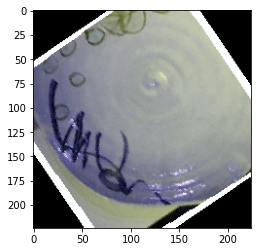

In [7]:
X_batch, y_batch = next(iter(train_dataloader))
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(X_batch[0].permute(1, 2, 0).numpy() * std + mean);

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


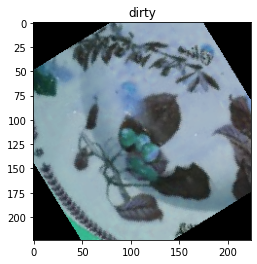

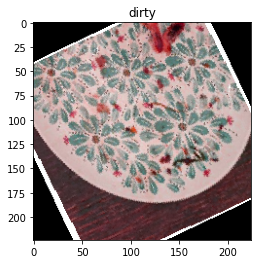

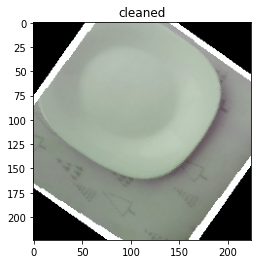

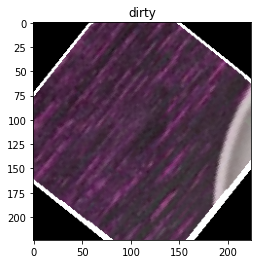

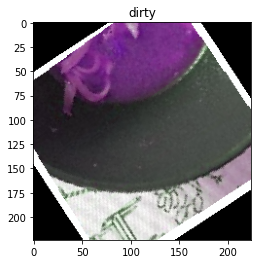

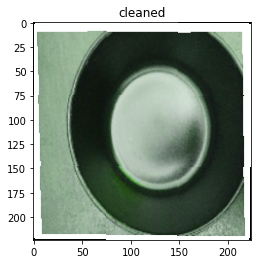

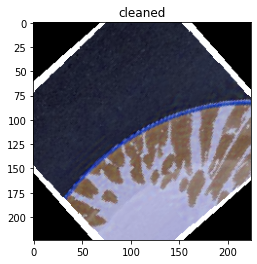

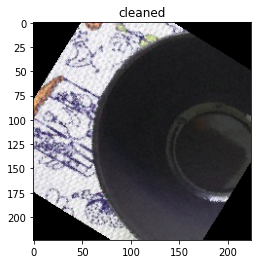

In [8]:
def show_input(input_tensor, title=''):
    image = input_tensor.permute(1, 2, 0).numpy()
    image = std * image + mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)

X_batch, y_batch = next(iter(train_dataloader))

for x_item, y_item in zip(X_batch, y_batch):
    show_input(x_item, title=class_names[y_item])

In [9]:
def train_model(model, loss, optimizer, scheduler, num_epochs):
    for epoch in range(num_epochs):
        print('Epoch {}/{}:'.format(epoch, num_epochs - 1), flush=True)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = train_dataloader
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                dataloader = val_dataloader
                model.eval()   # Set model to evaluate mode

            running_loss = 0.
            running_acc = 0.

            # Iterate over data.
            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # forward and backward
                with torch.set_grad_enabled(phase == 'train'):
                    preds = model(inputs)
                    loss_value = loss(preds, labels)
                    preds_class = preds.argmax(dim=1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss_value.backward()
                        optimizer.step()

                # statistics
                running_loss += loss_value.item()
                running_acc += (preds_class == labels.data).float().mean()

            epoch_loss = running_loss / len(dataloader)
            epoch_acc = running_acc / len(dataloader)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc), flush=True)

    return model

In [10]:
model = models.resnet152(pretrained=True)

# Disable grad for all conv layers
for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Linear(model.fc.in_features, 2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)

# Decay LR by a factor of 0.1 every 7 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [11]:
train_model(model, loss, optimizer, scheduler, num_epochs=30);

Epoch 0/29:


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slown

train Loss: 0.7657 Acc: 0.4688



100%|██████████| 1/1 [00:04<00:00,  4.26s/it]

val Loss: 0.7598 Acc: 0.5000
Epoch 1/29:



100%|██████████| 4/4 [00:18<00:00,  4.64s/it]

train Loss: 0.6809 Acc: 0.4375



100%|██████████| 1/1 [00:04<00:00,  4.29s/it]

val Loss: 0.6639 Acc: 0.5000
Epoch 2/29:



100%|██████████| 4/4 [00:18<00:00,  4.66s/it]

train Loss: 0.5860 Acc: 0.8125



100%|██████████| 1/1 [00:04<00:00,  4.28s/it]

val Loss: 0.6771 Acc: 0.5000
Epoch 3/29:



100%|██████████| 4/4 [00:18<00:00,  4.65s/it]

train Loss: 0.5957 Acc: 0.5938



100%|██████████| 1/1 [00:04<00:00,  4.27s/it]

val Loss: 0.6064 Acc: 0.7500
Epoch 4/29:



100%|██████████| 4/4 [00:18<00:00,  4.63s/it]

train Loss: 0.6095 Acc: 0.7188



100%|██████████| 1/1 [00:04<00:00,  4.27s/it]

val Loss: 0.5635 Acc: 0.7500
Epoch 5/29:



100%|██████████| 4/4 [00:18<00:00,  4.63s/it]

train Loss: 0.5697 Acc: 0.6250



100%|██████████| 1/1 [00:04<00:00,  4.26s/it]

val Loss: 0.5013 Acc: 0.8750
Epoch 6/29:



100%|██████████| 4/4 [00:18<00:00,  4.60s/it]

train Loss: 0.5373 Acc: 0.7812



100%|██████████| 1/1 [00:04<00:00,  4.24s/it]

val Loss: 0.5090 Acc: 0.8750
Epoch 7/29:



100%|██████████| 4/4 [00:18<00:00,  4.62s/it]

train Loss: 0.5249 Acc: 0.7500



100%|██████████| 1/1 [00:04<00:00,  4.25s/it]

val Loss: 0.5234 Acc: 0.7500
Epoch 8/29:



100%|██████████| 4/4 [00:18<00:00,  4.61s/it]

train Loss: 0.4882 Acc: 0.8438



100%|██████████| 1/1 [00:04<00:00,  4.33s/it]

val Loss: 0.4964 Acc: 0.7500
Epoch 9/29:



100%|██████████| 4/4 [00:18<00:00,  4.61s/it]

train Loss: 0.4890 Acc: 0.8438



100%|██████████| 1/1 [00:04<00:00,  4.22s/it]

val Loss: 0.5098 Acc: 0.7500
Epoch 10/29:



100%|██████████| 4/4 [00:18<00:00,  4.58s/it]

train Loss: 0.5198 Acc: 0.7500



100%|██████████| 1/1 [00:04<00:00,  4.19s/it]

val Loss: 0.5035 Acc: 0.8750
Epoch 11/29:



100%|██████████| 4/4 [00:18<00:00,  4.58s/it]

train Loss: 0.6348 Acc: 0.6250



100%|██████████| 1/1 [00:04<00:00,  4.25s/it]

val Loss: 0.5185 Acc: 0.7500
Epoch 12/29:



100%|██████████| 4/4 [00:18<00:00,  4.59s/it]

train Loss: 0.5170 Acc: 0.7812



100%|██████████| 1/1 [00:04<00:00,  4.27s/it]

val Loss: 0.5058 Acc: 0.8750
Epoch 13/29:



100%|██████████| 4/4 [00:18<00:00,  4.59s/it]

train Loss: 0.4771 Acc: 0.7812



100%|██████████| 1/1 [00:04<00:00,  4.20s/it]

val Loss: 0.4866 Acc: 0.8750
Epoch 14/29:



100%|██████████| 4/4 [00:18<00:00,  4.59s/it]

train Loss: 0.5731 Acc: 0.7500



100%|██████████| 1/1 [00:04<00:00,  4.20s/it]

val Loss: 0.4924 Acc: 0.7500
Epoch 15/29:



100%|██████████| 4/4 [00:18<00:00,  4.60s/it]

train Loss: 0.5112 Acc: 0.7500



100%|██████████| 1/1 [00:04<00:00,  4.27s/it]

val Loss: 0.4756 Acc: 0.8750
Epoch 16/29:



100%|██████████| 4/4 [00:18<00:00,  4.58s/it]

train Loss: 0.5065 Acc: 0.6875



100%|██████████| 1/1 [00:04<00:00,  4.23s/it]

val Loss: 0.4746 Acc: 0.7500
Epoch 17/29:



100%|██████████| 4/4 [00:18<00:00,  4.59s/it]

train Loss: 0.5522 Acc: 0.7812



100%|██████████| 1/1 [00:04<00:00,  4.20s/it]

val Loss: 0.4821 Acc: 0.8750
Epoch 18/29:



100%|██████████| 4/4 [00:18<00:00,  4.55s/it]

train Loss: 0.5122 Acc: 0.7812



100%|██████████| 1/1 [00:04<00:00,  4.19s/it]

val Loss: 0.4777 Acc: 0.8750
Epoch 19/29:



100%|██████████| 4/4 [00:18<00:00,  4.53s/it]

train Loss: 0.5350 Acc: 0.7500



100%|██████████| 1/1 [00:04<00:00,  4.16s/it]

val Loss: 0.4711 Acc: 0.8750
Epoch 20/29:



100%|██████████| 4/4 [00:18<00:00,  4.52s/it]

train Loss: 0.4938 Acc: 0.7812



100%|██████████| 1/1 [00:04<00:00,  4.18s/it]

val Loss: 0.4693 Acc: 0.8750
Epoch 21/29:



100%|██████████| 4/4 [00:18<00:00,  4.50s/it]

train Loss: 0.4482 Acc: 0.8438



100%|██████████| 1/1 [00:04<00:00,  4.15s/it]

val Loss: 0.4594 Acc: 0.8750
Epoch 22/29:



100%|██████████| 4/4 [00:18<00:00,  4.52s/it]

train Loss: 0.5013 Acc: 0.8125



100%|██████████| 1/1 [00:04<00:00,  4.15s/it]

val Loss: 0.4612 Acc: 0.8750
Epoch 23/29:



100%|██████████| 4/4 [00:18<00:00,  4.52s/it]

train Loss: 0.4690 Acc: 0.7500



100%|██████████| 1/1 [00:04<00:00,  4.09s/it]

val Loss: 0.4750 Acc: 0.8750
Epoch 24/29:



100%|██████████| 4/4 [00:17<00:00,  4.44s/it]

train Loss: 0.4391 Acc: 0.9375



100%|██████████| 1/1 [00:04<00:00,  4.11s/it]

val Loss: 0.4592 Acc: 0.8750
Epoch 25/29:



100%|██████████| 4/4 [00:17<00:00,  4.47s/it]

train Loss: 0.4738 Acc: 0.9062



100%|██████████| 1/1 [00:04<00:00,  4.12s/it]

val Loss: 0.4746 Acc: 0.8750
Epoch 26/29:



100%|██████████| 4/4 [00:17<00:00,  4.49s/it]

train Loss: 0.4969 Acc: 0.7500



100%|██████████| 1/1 [00:04<00:00,  4.09s/it]

val Loss: 0.4876 Acc: 0.8750
Epoch 27/29:



100%|██████████| 4/4 [00:17<00:00,  4.46s/it]

train Loss: 0.4942 Acc: 0.8438



100%|██████████| 1/1 [00:04<00:00,  4.18s/it]

val Loss: 0.4895 Acc: 0.8750
Epoch 28/29:



100%|██████████| 4/4 [00:17<00:00,  4.45s/it]

train Loss: 0.5552 Acc: 0.7500



100%|██████████| 1/1 [00:04<00:00,  4.09s/it]

val Loss: 0.5003 Acc: 0.8750
Epoch 29/29:



100%|██████████| 4/4 [00:18<00:00,  4.52s/it]

train Loss: 0.5661 Acc: 0.8438



100%|██████████| 1/1 [00:04<00:00,  4.12s/it]

val Loss: 0.5041 Acc: 0.8750


In [12]:
test_dir = 'test'
shutil.copytree(os.path.join(data_root, 'test'), os.path.join(test_dir, 'unknown'))

'test/unknown'

In [13]:
class ImageFolderWithPaths(torchvision.datasets.ImageFolder):
    def __getitem__(self, index):
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        path = self.imgs[index][0]
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path
    
test_dataset = ImageFolderWithPaths(test_dir, val_transforms)

test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, num_workers=batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [14]:
model.eval()

test_predictions = []
test_img_paths = []
for inputs, labels, paths in tqdm(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    with torch.set_grad_enabled(False):
        preds = model(inputs)
    test_predictions.append(
        torch.nn.functional.softmax(preds, dim=1)[:,1].data.cpu().numpy())
    test_img_paths.extend(paths)
    
test_predictions = np.concatenate(test_predictions)

  0%|          | 0/93 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 93/93 [05:43<00:00,  3.70s/it]


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


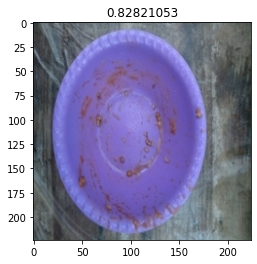

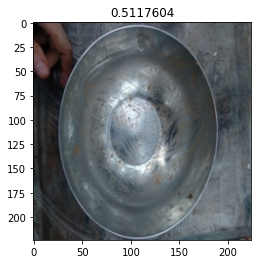

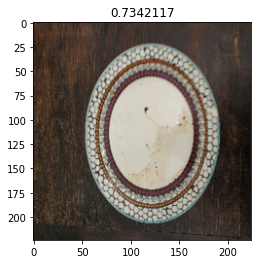

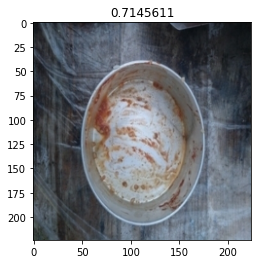

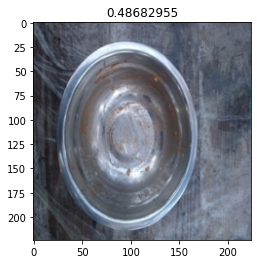

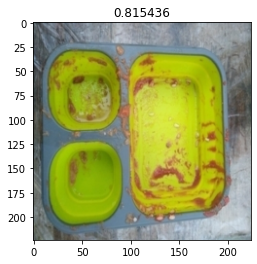

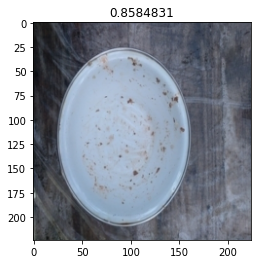

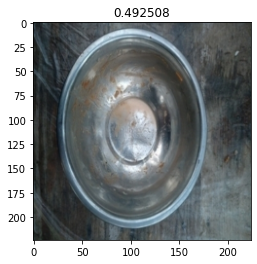

In [15]:
inputs, labels, paths = next(iter(test_dataloader))

for img, pred in zip(inputs, test_predictions):
    show_input(img, title=pred)

In [25]:
submission_df = pd.DataFrame.from_dict({'id': test_img_paths, 'label': test_predictions})

In [22]:
submission_df['label'] = submission_df['label'].map(lambda pred: 'dirty' if pred > 0.49 else 'cleaned')
submission_df['id'] = submission_df['id'].str.replace('test/unknown/', '')
submission_df['id'] = submission_df['id'].str.replace('.jpg', '')
submission_df.set_index('id', inplace=True)
submission_df.head(n=6)

,label
id,
0000,dirty
0001,dirty
0002,dirty
0003,dirty
0004,cleaned
0005,dirty


In [26]:
submission_df.to_csv('submission.csv')

In [24]:
!rm -rf train val test